# Module 1b: Analyzing your image - The Histogram
****

### Histogram<br>

<img src="Graphics/Histo.png"><br>

[Open CV Histogram Guide](https://docs.opencv.org/4.x/de/db2/tutorial_py_table_of_contents_histograms.html)

We need tools to analyze the information contained in images.  One of the main tools used in any image processing for this task is the **Histogram**.  A **Histogram** is a plot of the brightness (intensity) distribution of an image which in our case has a range of 0 to 255 (8-bit).  The X-axis corresponds to the brightness value and the Y-axis corresponds to the number of pixels at the given brightness in the image. 

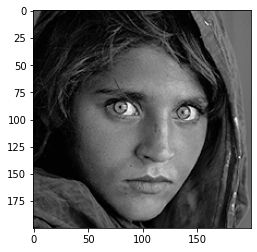

In [2]:
#Import Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Saving an image. 0 for grayscale. 1 for color. -1 for color with a alpha channel. 
img = cv2.imread('Graphics/face.png', 1)


#OpenCV by defualt uses BGR instead of RGB.  BGR is an old digital camera standard which has to be convert to RGB. Convert it to Gray.  How to in the next chapter. 
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Use matplotlib while using a python notebook
plt.imshow(img, cmap='gray')

So now we use cv2.calcHist() function to find the histogram. Let's familiarize ourselves with the function and its parameters : <br><br>

<code>cv2.calcHist(image, channels, mask, histSize, ranges)</code><br>
+ **image** : it is the source image of type uint8 or float32. it should be given in square brackets, ie, "[img]".<br>
+ **channels** : it is also given in square brackets. It is the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.
+ **mask** : mask image. To find histogram of full image, it is given as "None". But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask. (I will show an example later.)
+ **histSize** : this represents our BIN count. Need to be given in square brackets. For full scale, we pass [256].
+ **ranges** : this is our RANGE. Normally, it is [0,255].

In [3]:
print(img.shape)

# 2D array only containing on value for the brightness. 

(200, 200)


### Plot the 1-D histogram using Open CV

In [4]:
hist = cv2.calcHist([img],[0],None,[256],[0,255])
print(hist.shape)

(256, 1)


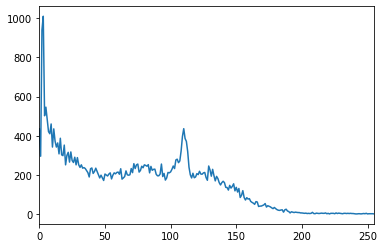

In [5]:
# Plot the hitogram
plt.plot(hist)
# Limit the range to 0, 255
plt.xlim([0,255])
# Show the plot
plt.show()

### Plot the histogram using MatPlotLib

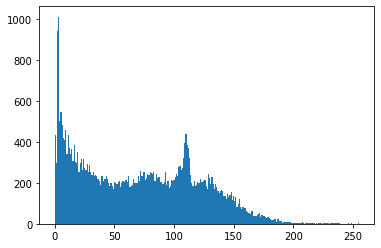

In [6]:
plt.hist(img.ravel(),256,[0,255]); plt.show()

In [7]:
# ravel() flattens a multi-dimensional array into a 1-D array.  same as reshape(-1). or use flatten() for larger arrays. 

# Create a 2-D array
arrayFlat = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]])

# This is the arrays shape
print("This is the shape of the original array:",arrayFlat.shape)

# The original array
print("The original array:")
print(arrayFlat)

# Apply ravel
arrayFlat = np.ravel(arrayFlat)

# 1-D array
print("Converted to 1-D array:")
print(arrayFlat)

This is the shape of the original array: (3, 4)
The original array:
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
Converted to 1-D array:
[ 1  2  3  4  5  6  7  8  9 10 11 12]


### Let's plot the Histogram of a color image. 

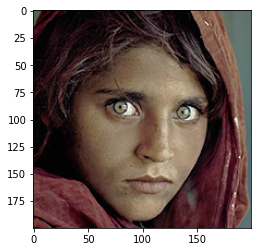

In [8]:
#Saving an image. 0 for grayscale. 1 for color. -1 for color with a alpha channel. 
img = cv2.imread('Graphics/face.png', 1)

#OpenCV by defualt uses BGR instead of RGB.  BGR is an old digital camera standard which has to be convert to RGB. 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)

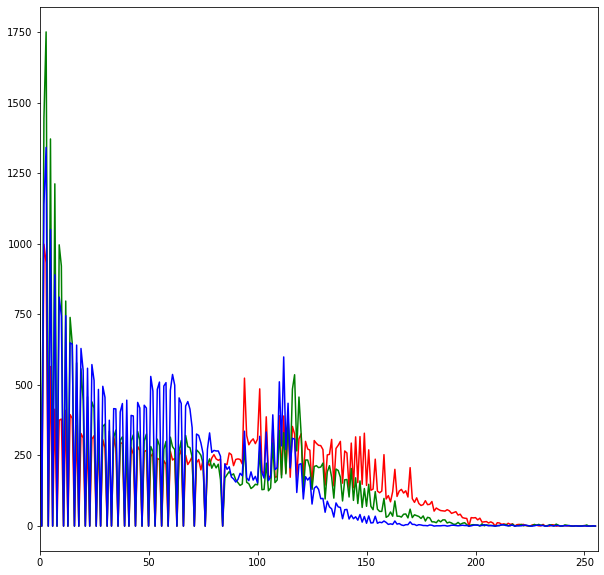

In [9]:
#Saving an image. 0 for grayscale. 1 for color. -1 for color with a alpha channel. 
img = cv2.imread('Graphics/face.png', 1)

#OpenCV by defualt uses BGR instead of RGB.  BGR is an old digital camera standard which has to be convert to RGB. 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Let's make the plot larger. 
fig = plt.figure(figsize=(10,10))

# First plot for the red channel.
hist = cv2.calcHist([img],[0],None,[256],[0,255])
plt.plot(hist, color='red')
plt.xlim([0,256])

# Second plot for the green channel.
hist = cv2.calcHist([img],[1],None,[256],[0,255])
plt.plot(hist, color='green')
plt.xlim([0,256])

# Third plot the the blue channel. 
hist = cv2.calcHist([img],[2],None,[256],[0,255])
plt.plot(hist, color='blue')
plt.xlim([0,256])

plt.show()

### 2-D Histogram<br>

**Added for those who want to investigate more**

It is quite simple and calculated using the same function, cv.calcHist(). For color histograms, we need to convert the image from BGR to HSV. (Remember, for 1D histogram, we converted from BGR to Grayscale). For 2D histograms, its parameters will be modified as follows:<br>

+ channels = [0,1] because we need to process both H and S plane.
+ bins = [180,256] 180 for H plane and 256 for S plane.
+ range = [0,180,0,256] Hue value lies between 0 and 180 & Saturation lies between 0 and 256.

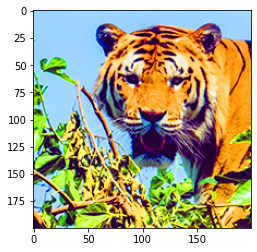

In [10]:
#Saving an image. 0 for grayscale. 1 for color. -1 for color with a alpha channel. 
img = cv2.imread('Graphics/tiger.png', 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

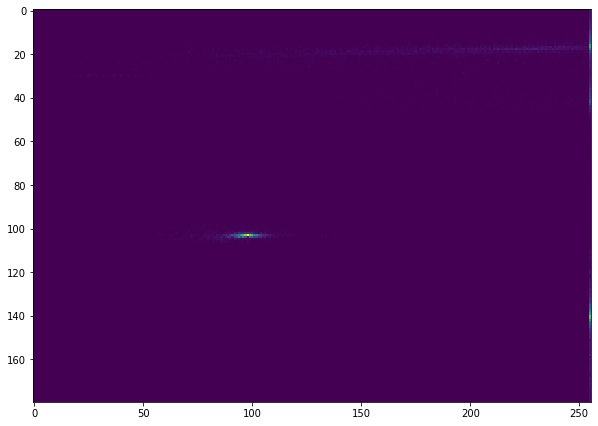

In [11]:
fig = plt.figure(figsize=(10,10))
hsv = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
hist = cv2.calcHist( [hsv], [0, 1], None, [180, 256], [0, 180, 0, 256] )
plt.imshow(hist,interpolation = 'nearest')
plt.show()


### Equalization

Consider an image whose pixel values are confined to some specific range of values only. For eg, brighter image will have all pixels confined to high values. But a good image will have pixels from all regions of the image. So you need to stretch this histogram to either ends.  This normally improves the contrast of the image.<p>

<img src="Graphics/hist_equal.png">

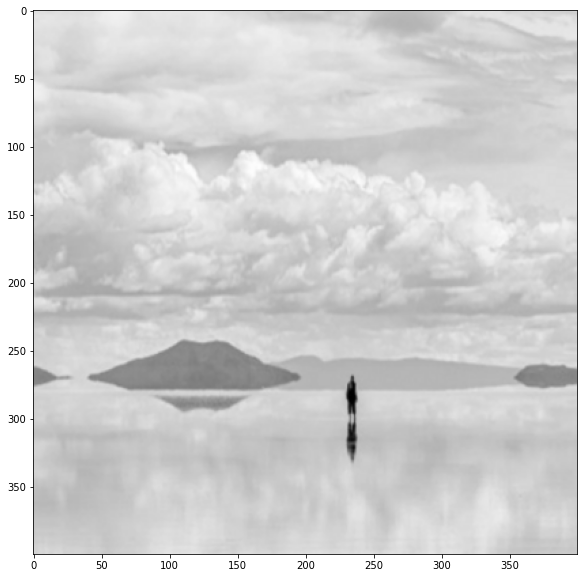

In [12]:
#Saving an image. 0 for grayscale. 1 for color. -1 for color with a alpha channel. 
imgContrast = cv2.imread('Graphics/lowcontrast.png', 0)

#OpenCV by defualt uses BGR instead of RGB.  BGR is an old digital camera standard which has to be convert to RGB. 
imgContrast = cv2.cvtColor(imgContrast, cv2.COLOR_BGR2RGB)

# Set the size of the plot.
fig = plt.figure(figsize = (10,10))

# Show the image as grayscale.
plt.imshow(imgContrast, cmap='gray')

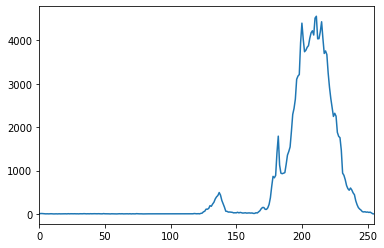

In [13]:
hist = cv2.calcHist([imgContrast],[0],None,[256],[0,255])
# Plot the hitogram
plt.plot(hist)
# Limit the range to 0, 255
plt.xlim([0,255])
# Show the plot
plt.show()

### [Histogram Equalization Formula](https://en.wikipedia.org/wiki/Histogram_equalization)

#### Lookup table (LUT)
An LUT is simply a table of cross-references linking index numbers to output values. The most common use is to determine the colors and intensity values with which a particular image will be displayed, and in this context the LUT is often called simply a colormap.

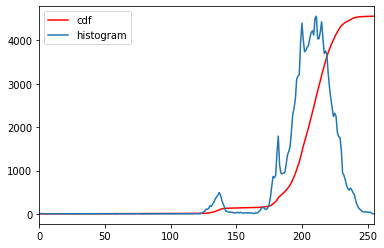

In [14]:
# Get the cumulative sum of the images histogram. [2,4,6,1,3,5] -> [2,6,12,13,16,21] .  CDF = cumulative distribution function.
cdf = hist.cumsum()

# normalize the cumulative sum.  Cumulative sum multiplied by the value with the maximum frequency divided the maximum value.
cdf_normalized = cdf * float(hist.max()) / cdf.max()

# Plot the normalized cdf in red.
plt.plot(cdf_normalized, color = 'r')

#Plot the histogram
plt.plot(hist)

# Limit the range to 0, 255
plt.xlim([0,255])

#Add a legend.
plt.legend(('cdf','histogram'), loc = 'upper left')

#Show the plot. 
plt.show()

In [15]:
# Mask out 0 to find your minimum value.  This is what np.ma.masked_equal accomplishes. 
cdf_m = np.ma.masked_equal(cdf,0)

# Histogram equalization equation.  Taken from wikipedia.
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())

# Set values to uint8 and fill the look up table. 
cdf = np.ma.filled(cdf_m,0).astype('uint8')

In [16]:
# We've created a look up table to map the original pixel values to equalized values.  Look up tables are also referred to as LUT. 
imgContrast = cdf[imgContrast]

# Example of using a look up table (LUT). 
arr = np.array([[1,2,3],[0,0,1]])
lut = np.array([0,2,5,7,8,12])
print(lut[arr])

[[2 5 7]
 [0 0 2]]


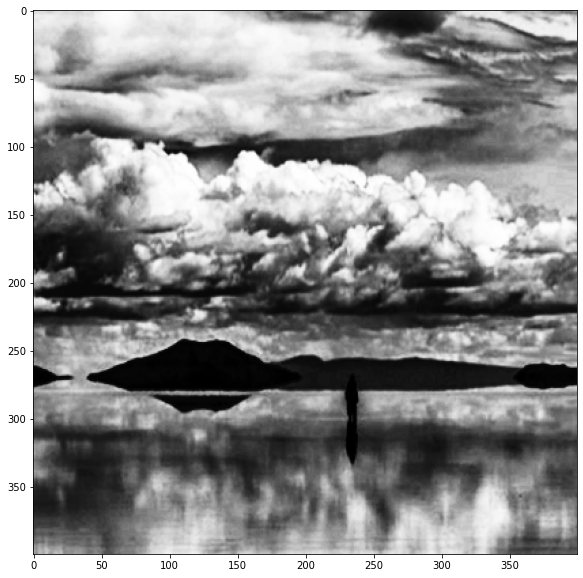

In [17]:
fig = plt.figure(figsize = (10,10))
plt.imshow(imgContrast)

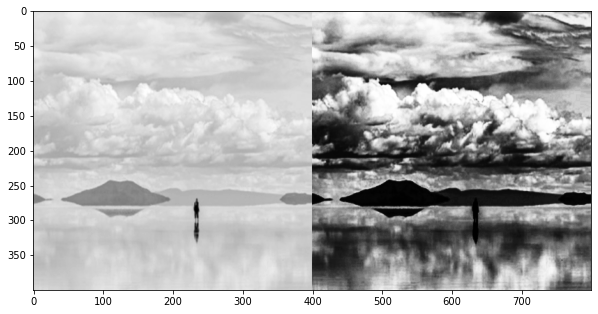

In [18]:
#Read in and save image.
imgContrast = cv2.imread('Graphics/lowcontrast.png', 0)

#Equalize histogram in OpenCv.
equ = cv2.equalizeHist(imgContrast)

#Combine the original and equalized image along the horizontal axis so they can be displayed at the same time.  axis=0 for vertical axis=1 for horizontal alignment.
imgTwo = np.concatenate((imgContrast, equ), axis=1)

#Set figure size.
fig = plt.figure(figsize = (10,10))

#Display the images
plt.imshow(imgTwo, cmap='gray')

### Brightness and Contrast
<code>cv2.convertScaleAbs(img, alpha, beta)</code>

+ **img**: is the original input image.
+ **alpha**: is the contrast value. To lower the contrast, use 0 < alpha < 1. And for higher contrast use alpha > 1.
+ **beta**: is the brightness value. A good range for brightness value is [-127, 127]


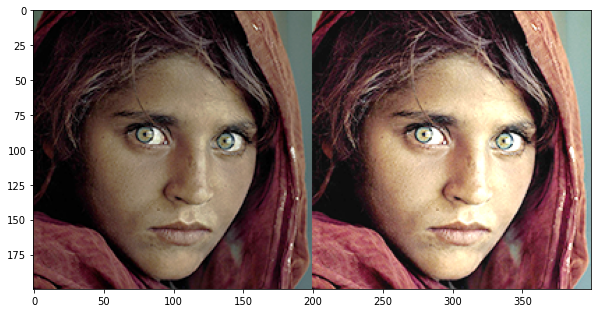

In [19]:
#Read in and save image.
img = cv2.imread('Graphics/face.png', 1)

#Convert to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Increase brightness and contrast.
imgContrast = cv2.convertScaleAbs(img,alpha=1.5,beta=10)

imgTwo = np.concatenate((img, imgContrast), axis=1)

#Set figure size.
fig = plt.figure(figsize = (10,10))

#Display the images
plt.imshow(imgTwo)


### Histogram Back Projection

Not required but an interesting topic.

[Histogram Back Projection](https://docs.opencv.org/4.x/dc/df6/tutorial_py_histogram_backprojection.html)